# Markov Chain Transition Matrix with Two-Step Memory
This notebook simulates a random process, constructs transition matrices, and analyzes the stochastic behavior of a process defined as the sum of two normal distributions.

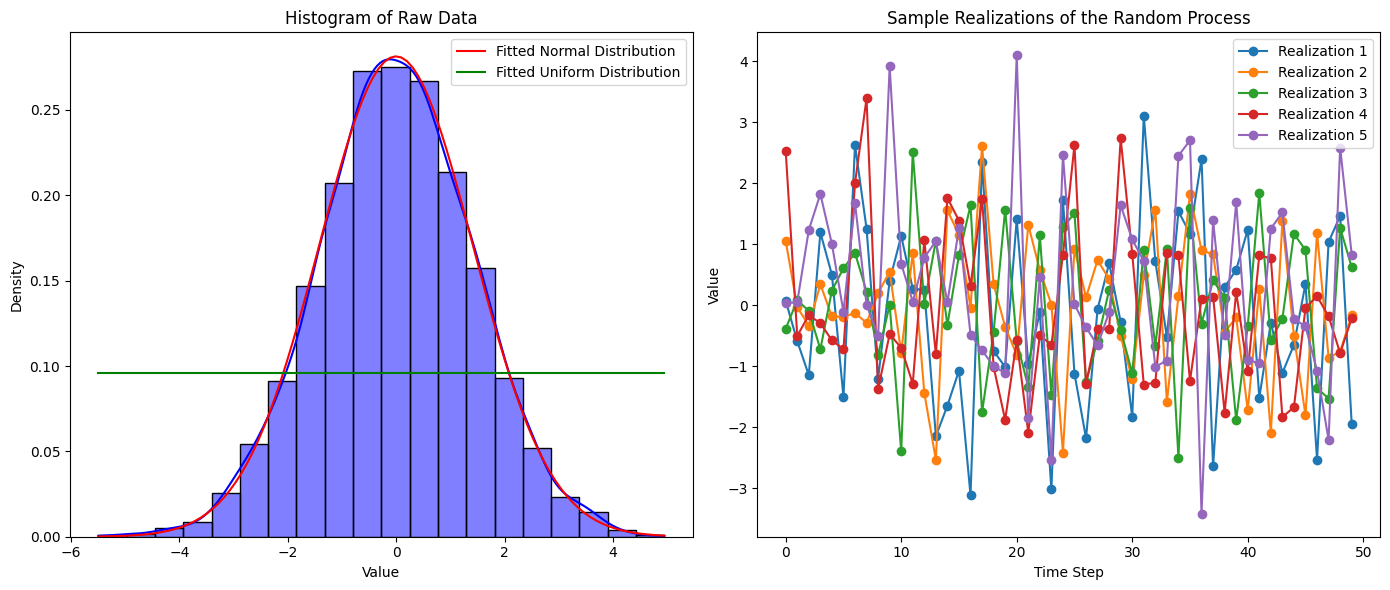

In [1]:

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Simulate a random process with multiple realizations
num_realizations = 100  # Number of independent sequences
num_steps = 50  # Number of time steps per sequence

# Generate a process X_k as a sum of two independent normal processes
np.random.seed(42)  # For reproducibility
Y_k = np.random.normal(loc=0, scale=1, size=(num_realizations, num_steps))
Z_k = np.random.normal(loc=0, scale=1, size=(num_realizations, num_steps))
X_k = Y_k + Z_k  # The observed process as a sum of two processes

# Flatten the data to analyze the overall distribution
X_flat = X_k.flatten()

# Plot histogram of the raw data with fitted normal and uniform distributions
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Histogram of the data
sns.histplot(X_flat, bins=20, kde=True, color="blue", stat="density", ax=ax[0])
ax[0].set_title("Histogram of Raw Data")
ax[0].set_xlabel("Value")
ax[0].set_ylabel("Density")

# Fit normal distribution
mu, sigma = stats.norm.fit(X_flat)
x_range = np.linspace(min(X_flat), max(X_flat), 100)
pdf_norm = stats.norm.pdf(x_range, mu, sigma)
ax[0].plot(x_range, pdf_norm, 'r', label="Fitted Normal Distribution")

# Fit uniform distribution
a, b = np.min(X_flat), np.max(X_flat)
pdf_uniform = stats.uniform.pdf(x_range, a, b - a)
ax[0].plot(x_range, pdf_uniform, 'g', label="Fitted Uniform Distribution")

ax[0].legend()

# Plot a few realizations to see how values evolve over time
for i in range(5):  # Plot 5 sample realizations
    ax[1].plot(X_k[i], marker="o", label=f"Realization {i+1}")

ax[1].set_title("Sample Realizations of the Random Process")
ax[1].set_xlabel("Time Step")
ax[1].set_ylabel("Value")
ax[1].legend()

plt.tight_layout()
plt.show()


In [2]:
def compute_transition_matrices(X_k, num_bins=5):
    bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
    
    # Find min and max values across all realizations
    max_value = np.max(X_k)
    min_value = np.min(X_k)
    
    # Define bin edges
    bin_edges = np.linspace(min_value, max_value, num=num_bins + 1)
    
    # Discretize the data into bins
    X_binned = np.apply_along_axis(lambda x: pd.cut(x, bins=bin_edges, labels=bin_labels, include_lowest=True), axis=1, arr=X_k)
    
    # Initialize transition matrices
    transition_matrix = np.zeros((num_bins, num_bins))
    transition_matrix_2step = np.zeros((num_bins, num_bins))
    
    # Compute transition counts
    for realization in X_binned:
        for i in range(len(realization) - 1):
            current_bin = bin_labels.index(realization[i])
            next_bin = bin_labels.index(realization[i + 1])
            transition_matrix[current_bin, next_bin] += 1
            
            if i < len(realization) - 2:
                next_next_bin = bin_labels.index(realization[i + 2])
                transition_matrix_2step[current_bin, next_next_bin] += 1
    
    # Normalize to get probabilities
    transition_matrix /= transition_matrix.sum(axis=1, keepdims=True, where=transition_matrix.sum(axis=1) != 0)
    transition_matrix_2step /= transition_matrix_2step.sum(axis=1, keepdims=True, where=transition_matrix_2step.sum(axis=1) != 0)
    
    # Convert to DataFrame
    transition_matrix_df = pd.DataFrame(transition_matrix, index=bin_labels, columns=bin_labels)
    transition_matrix_2step_df = pd.DataFrame(transition_matrix_2step, index=bin_labels, columns=bin_labels)
    
    return transition_matrix_df, transition_matrix_2step_df


In [3]:
transition_matrix_df, transition_matrix_2step_df = compute_transition_matrices(X_k, num_bins=5)


In [4]:
# give me the propability of being in low given that before i was in low and before that in medium 

p = transition_matrix_df.loc['Low', 'Low'] * transition_matrix_df.loc['Medium', 'Low']
p /= transition_matrix_df.loc['Medium'].sum()  # Normalize to get the conditional probability
print(f"Probability of being in 'Low' given previous states 'Medium' and 'Low' is : {p:.4f}")

# print all the possible scenarios 

bin_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# print all the probabilities of being in a state given the previous 2 states 
for i in range(5):
    for j in range(5):
        for k in range(5):
            p = transition_matrix_2step_df.iloc[i, j] * transition_matrix_df.iloc[j, k]
            p /= transition_matrix_df.iloc[j].sum()  # Normalize to get the conditional probability
            print(f"Probability of being in '{bin_labels[k]}' given previous states '{bin_labels[i]}' and '{bin_labels[j]}': {p:.4f}")


Probability of being in 'Low' given previous states 'Medium' and 'Low' is : 0.0303
Probability of being in 'Very Low' given previous states 'Very Low' and 'Very Low': 0.0000
Probability of being in 'Low' given previous states 'Very Low' and 'Very Low': 0.0000
Probability of being in 'Medium' given previous states 'Very Low' and 'Very Low': 0.0000
Probability of being in 'High' given previous states 'Very Low' and 'Very Low': 0.0000
Probability of being in 'Very High' given previous states 'Very Low' and 'Very Low': 0.0000
Probability of being in 'Very Low' given previous states 'Very Low' and 'Low': 0.0009
Probability of being in 'Low' given previous states 'Very Low' and 'Low': 0.0221
Probability of being in 'Medium' given previous states 'Very Low' and 'Low': 0.0597
Probability of being in 'High' given previous states 'Very Low' and 'Low': 0.0345
Probability of being in 'Very High' given previous states 'Very Low' and 'Low': 0.0019
Probability of being in 'Very Low' given previous st